In [2]:
# Katarzyna Stojek

# python 3.11.2
# numpy 1.24.2
# scipy 1.10.1
# matplotlib 3.7.1

import numpy as np
import scipy.signal as sig
from scipy.io import wavfile
import matplotlib.pyplot as plt

# częstotliwość próbkowania
fs = 48000

Wstęp:

Celem zadania było zapoznanie się z pojęciami: częstość próbkowania, częstość Nyquista, aliasing, zero-padding oraz upsampling a także podstawowymi własnościami transformaty Fouriera i zastosowaniem różnego rodzaju okien czasowych.

Aby tego dokonać wykorzystane zostaną wygenerowane i rzeczywiste sygnały, które porównywane będą ze swoimi widmami. Dzięki temu możliwe będzie zobaczenie jaki wpływ na sygnał i jego widmo ma dobór odpowiedniego okna. Dla przykładu muzycznego próbkowanego z różną częstością możliwe będzie zobrazowanie różnicy między sygnałem próbkowanym powyżej i poniżej częstotliwości Nyquista (aliasing). Następnie wykorzystany zostanie sygnał teoretyczny do sprawdzenia jaki wpływ na widmo mają techniki zero padding oraz upsampling. 

Text(0.5, 1.0, 'Widmo rzeczywiste w funkcji częstotliwości')

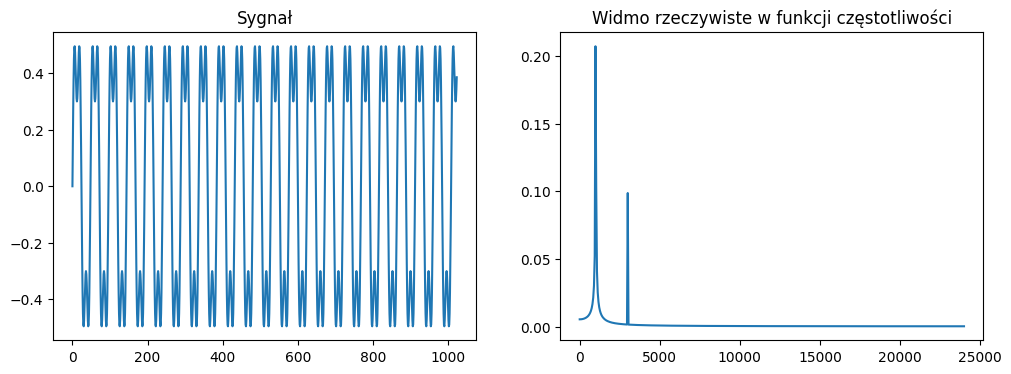

In [3]:
# Zad. 1a: Funkcja nieskończona
# Generacja sygnału nieskończonego i jego widma
n = np.arange(1024)
sinus = 0.5 * np.sin(2 * np.pi * n * 1000 / fs) + 0.2 * np.sin(2 * np.pi * n * 3000 / fs)
widmo = np.fft.rfft(sinus)
widmo_amp = np.abs(widmo) / 1024
f = np.fft.rfftfreq(1024, 1/fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(n, sinus)
ax2.plot(f, widmo_amp)
ax1.set_title("Sygnał")
ax2.set_title("Widmo rzeczywiste w funkcji częstotliwości")
# Obserwowane są piki dla każdej z częstotliwości obecnych w sygnale. Widoczne jest rozmycie w przypadku f=1000.

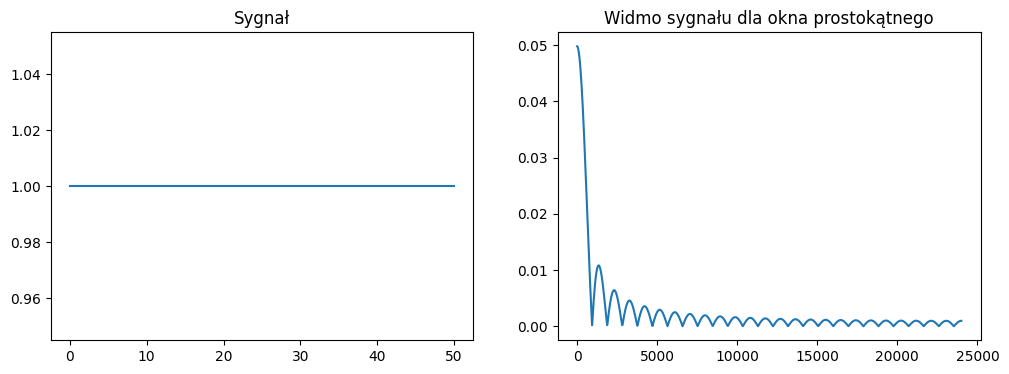

In [4]:
# Zad. 1b funkcja okna prostokątnego
window = sig.boxcar(51)
A = np.fft.rfft(window, 2048)
widmo_amp = np.abs(A) / 1024
f = np.fft.rfftfreq(2048, 1/fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(window)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału dla okna prostokątnego")
ax2.plot(f, widmo_amp, label='prostokątne')
# W widmie najwyższy pik dla zera a następnie mniejsze dla wyższych częstotliwości.

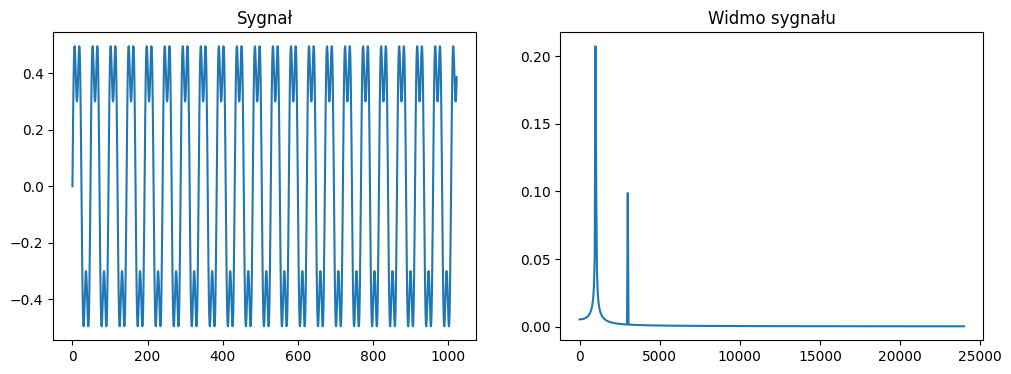

In [5]:
# Zad. 1c Sygnał skończony, czyli iloczyn sygnału nieskończonego i funkcji okna prostokątnego
n = np.arange(1024)
sin = 0.5 * np.sin(2 * np.pi * n * 1000 / fs) + 0.2 * np.sin(2 * np.pi * n * 3000 / fs)
window2 = sig.boxcar(1024)
fun_fin = sin*window2 #mnożenie jak mnożenie przez stałą. Nie wpływa na widmo, ani sygnał. 
# Efekt zgodny z przewidywaniem, ponieważ branie N próbek do analizy można potraktować jako mnożenie przez funkcję okna prostokątnego, 
# która przyjmuje wartość 1 dla próbek branych do widma.
widmo = np.fft.rfft(fun_fin)
widmo_amp = np.abs(widmo) / 1024
f = np.fft.rfftfreq(1024, 1/fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(fun_fin)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
ax2.plot(f, widmo_amp)

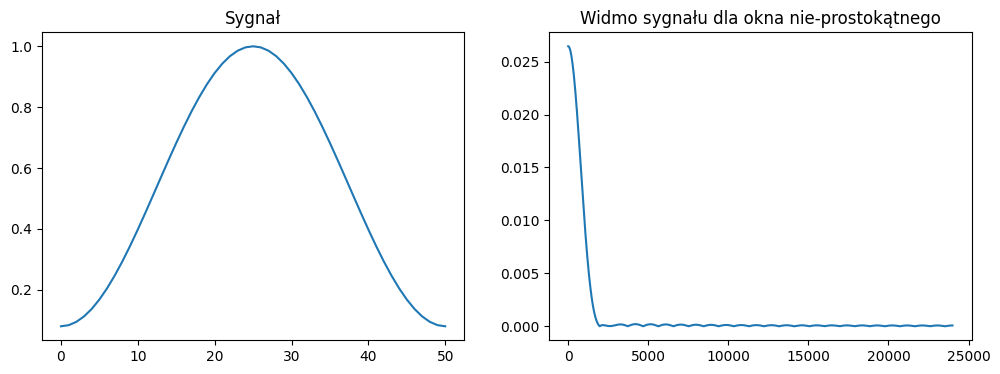

In [6]:
# Zad. 1d Funkcja okna nieprostokątnego
window = np.hamming(51)
A = np.fft.rfft(window, 2048)
widmo_amp = np.abs(A) / 1024
f = np.fft.rfftfreq(2048, 1/fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(window)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału dla okna nie-prostokątnego")
ax2.plot(f, widmo_amp)
# Widmo podobne do otrzymanego dla okna prostąkątnego, jako że najwyższy pik występuje dla zera. Piki dla wyższych częstotliwości 
# są znacznie niższe co do amplitudy.

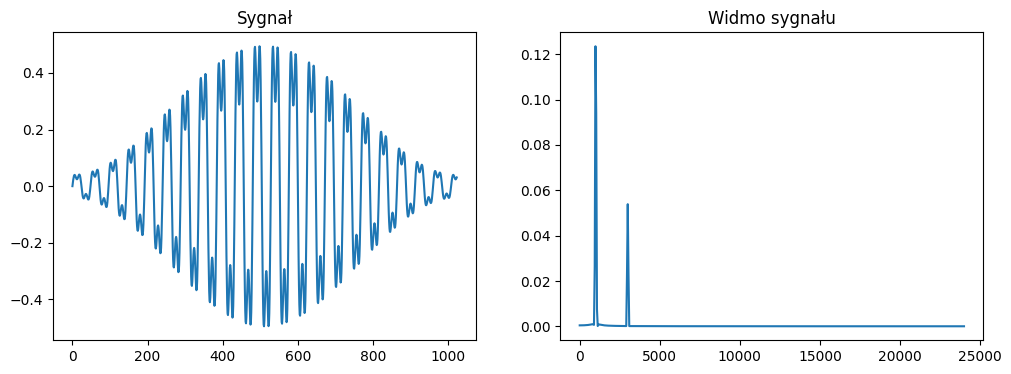

In [7]:
# Zad. 1e Sygnał skończony wygładzony oknem, czyli iloczyn sygnału nieskończonego i funkcji okna nie-prostokątnego
n = np.arange(1024)
sin = 0.5 * np.sin(2 * np.pi * n * 1000 / fs) + 0.2 * np.sin(2 * np.pi * n * 3000 / fs)
fun_fin_alt = sin*np.hamming(1024) #mnożenie jak mnożenie przez stałą. Nie wpływa na widmo, ani sygnał.
widmo = np.fft.rfft(fun_fin_alt)
widmo_amp = np.abs(widmo) / 1024
f = np.fft.rfftfreq(1024, 1/fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(fun_fin_alt)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
ax2.plot(f, widmo_amp)
#widocznie mniejsze rozmycie dla pierwszego piku widma, drugi z pików porównywalny do otrzymanego wcześniej.

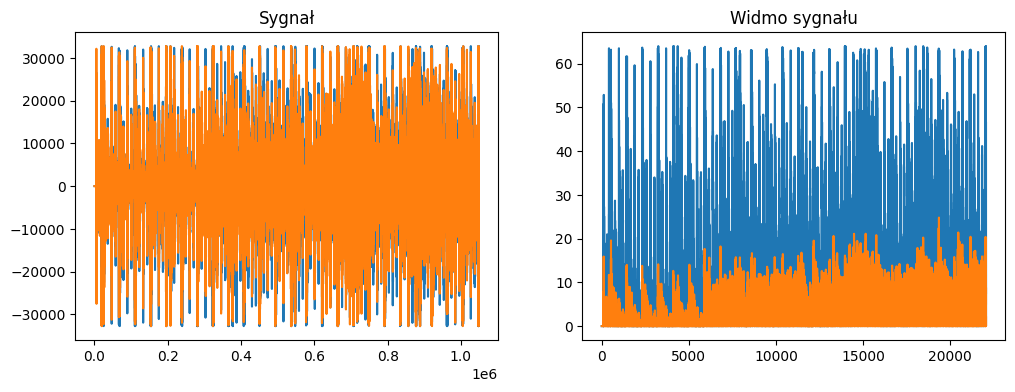

In [8]:
# Zad. 2 Twierdzenie o próbkowaniu. Aliasing. 
# Próbka pochodzi z utworu "I'll Sleep When I'm Dead" Bon Jovi
wav_fs, song = wavfile.read('I_ll_Sleep_When_I_m_Dead.wav')
song = song[:1048576, :]

widmo1 = np.fft.rfft(song)
widmo_amp1 = np.abs(widmo1) / 1024
f1 = np.fft.rfftfreq(2097152-1, 1/wav_fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(song)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
ax2.plot(f1, widmo_amp1)

In [9]:
#usuwanie co drugiej próbki
song2 = []
counter = 0
for s in song:
    if counter%2 == 0:
        song2.append(s)
    counter+=1
song2=np.array(song2)

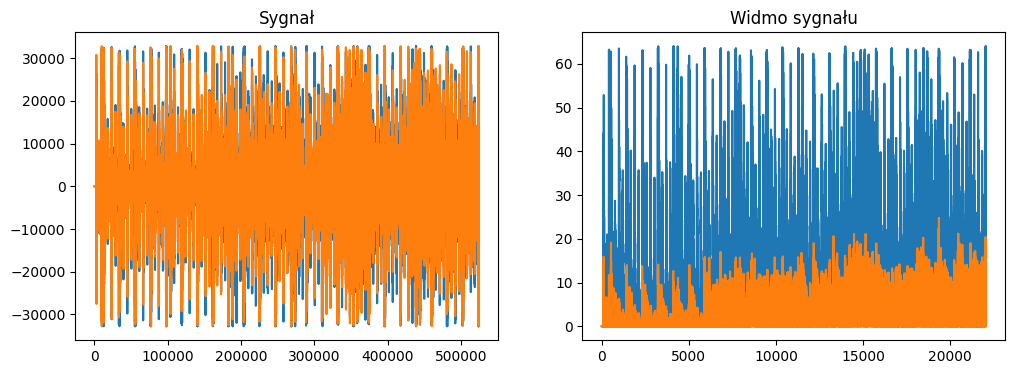

In [10]:
widmo2 = np.fft.rfft(song2)
widmo_amp2 = np.abs(widmo2) / 1024
f2 = np.fft.rfftfreq(1048576-1, 1/wav_fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(song2)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
ax2.plot(f2, widmo_amp2)
#wynik taki sam jak poprzednio

In [11]:
#usuwanie co drugiej próbki z co drugiej próbki
song3 = []
counter = 0
for s in song2:
    if counter%2 == 0:
        song3.append(s)
    counter+=1
song3=np.array(song3)

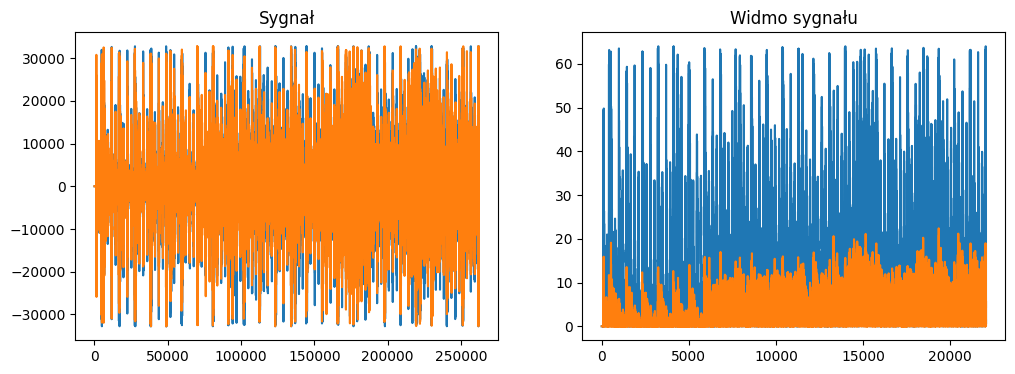

In [12]:
widmo3 = np.fft.rfft(song3)
widmo_amp3 = np.abs(widmo3) / 1024
f3 = np.fft.rfftfreq(524288-1, 1/wav_fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(song3)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
ax2.plot(f3, widmo_amp3)

In [13]:
#usuwanie co drugiej próbki z co drugiej próbki z co drugiej próbki
song4 = []
counter = 0
for s in song3:
    if counter%2 == 0:
        song4.append(s)
    counter+=1
song4=np.array(song4)

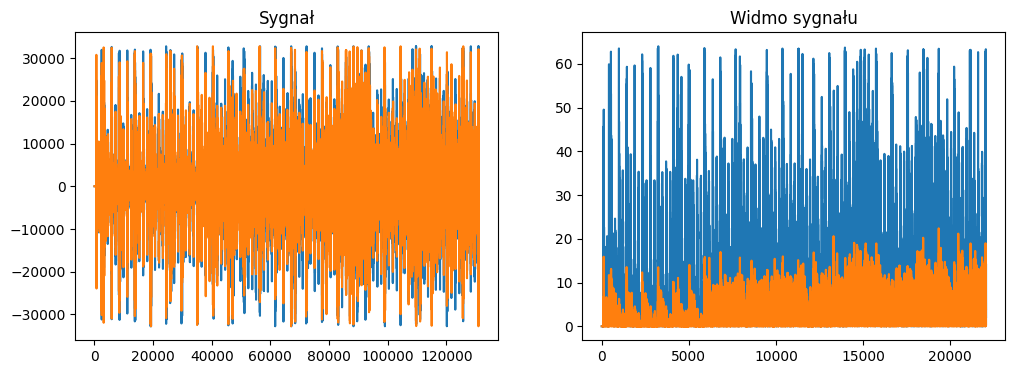

In [14]:
widmo4 = np.fft.rfft(song4)
widmo_amp4 = np.abs(widmo4) / 1024
f4 = np.fft.rfftfreq(262144-1, 1/wav_fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(song4)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
ax2.plot(f4, widmo_amp4)

In [15]:
#usuwanie co drugiej próbki z co drugiej próbki z co drugiej próbki z co drugiej próbki
song5 = []
counter = 0
for s in song4:
    if counter%2 == 0:
        song5.append(s)
    counter+=1
song5=np.array(song5)

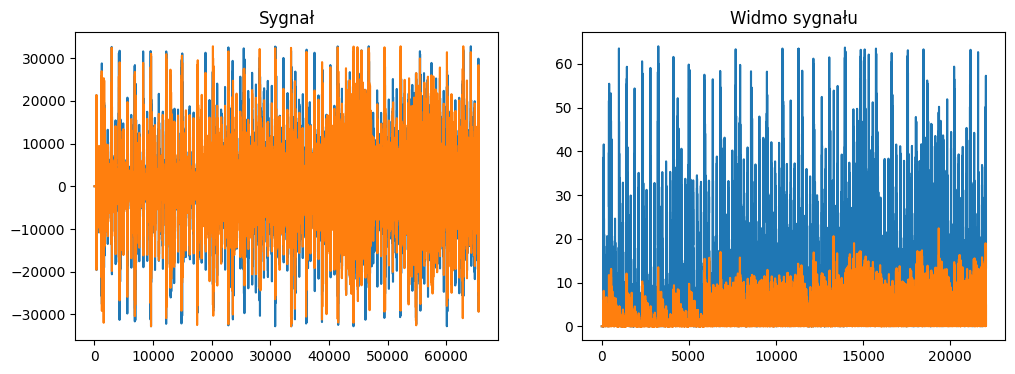

In [16]:
widmo5 = np.fft.rfft(song5)
widmo_amp5 = np.abs(widmo5) / 1024
f5 = np.fft.rfftfreq(131072-1, 1/wav_fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(song5)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
ax2.plot(f5, widmo_amp5)
#coraz większe różnice między sygnałem w kolejnych próbkach (dla zmniejszonej częstotliwości próbkowania) oraz widmami sygnału.

In [17]:
#usuwanie co drugiej próbki z co drugiej próbki z co drugiej próbki z co drugiej próbki z co drugiej próbki
song6 = []
counter = 0
for s in song5:
    if counter%2 == 0:
        song6.append(s)
    counter+=1
song6=np.array(song6)

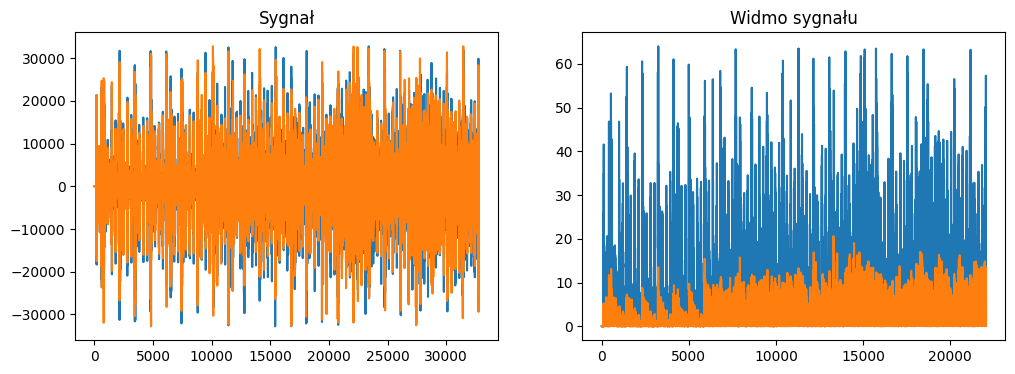

In [18]:
widmo6 = np.fft.rfft(song6)
widmo_amp6 = np.abs(widmo6) / 1024
f6 = np.fft.rfftfreq(65536-1, 1/wav_fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(song6)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
ax2.plot(f6, widmo_amp6[:,0],label='widmo 6 part 1')
ax2.plot(f6, widmo_amp6[:,1],label='widmo 6 part 2')
#różnice coraz bardziej widoczne, w sygnale rosnące luki

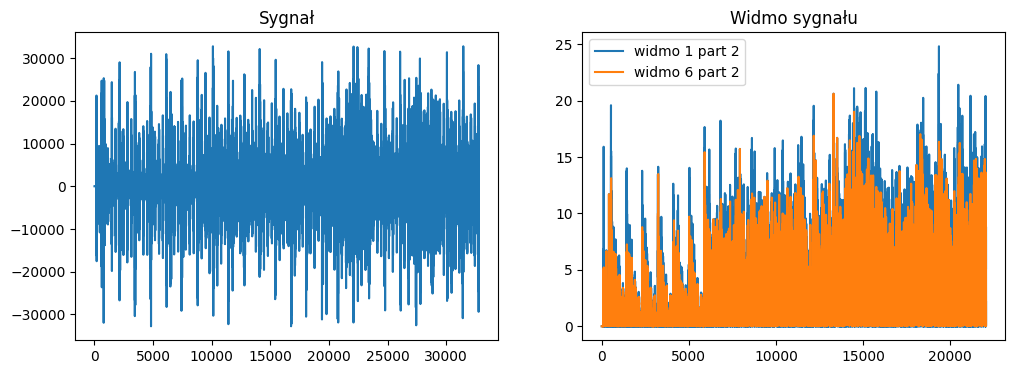

In [19]:
# porównajmy sygnały i widma po pięciu decymacjach sygnału
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
#ax1.plot(song6[:,0])
ax1.plot(song6[:,1],label='sygnał - part 2')
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
#ax2.plot(f1, widmo_amp1[:,0],label='widmo 1 part 1')
#ax2.plot(f6, widmo_amp6[:,0],label='widmo 6 part 1')
ax2.plot(f1, widmo_amp1[:,1],label='widmo 1 part 2')
ax2.plot(f6, widmo_amp6[:,1],label='widmo 6 part 2')
ax2.legend()
# W znaczącej części przypadków amplitudy dla poszczególnych częstotliwości maleją (prawdopodobnie ponieważ mamy mniej próbek) 
# ale dla niektórych liczba zliczeń jest podobna lub wyższa (podejrzany - aliasing).

In [20]:
#usuwanie co drugiej próbki z co drugiej próbki z co drugiej próbki z co drugiej próbki z co drugiej próbki z co drugiej próbki
song7 = []
counter = 0
for s in song6:
    if counter%2 == 0:
        song7.append(s)
    counter+=1
song7=np.array(song7)

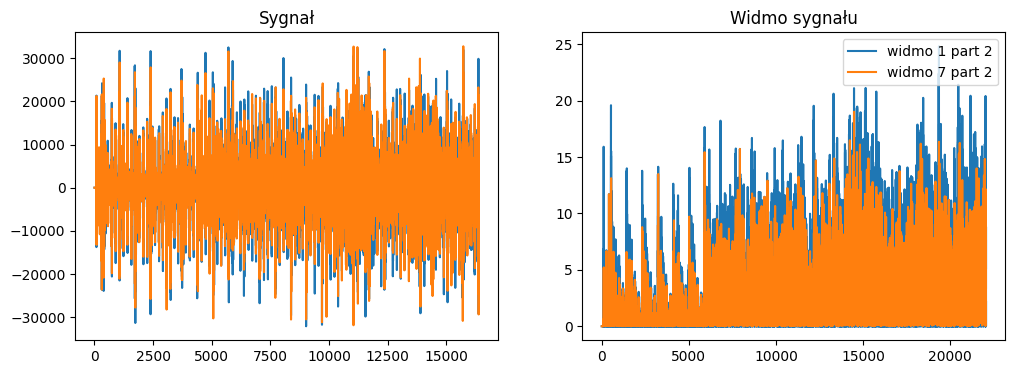

In [21]:
widmo7 = np.fft.rfft(song7)
widmo_amp7 = np.abs(widmo7) / 1024
f7 = np.fft.rfftfreq(32768-1, 1/wav_fs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(song7)
ax1.set_title("Sygnał")
ax2.set_title("Widmo sygnału")
# możliwości do porównania
# ax2.plot(f1, widmo_amp1[:,0],label='widmo 1 part 1')
# ax2.plot(f7, widmo_amp7[:,0],label='widmo 7 part 1')
ax2.plot(f1, widmo_amp1[:,1],label='widmo 1 part 2')
ax2.plot(f7, widmo_amp7[:,1],label='widmo 7 part 2')
ax2.legend(loc=1,)

In [28]:
# Element dodatkowy - zapisanie wytworzonych próbek i przesłuchanie ich w celu zobaczenia jak zmienia się brzmienie utworu i usłyszenia
# wpływu aliasingu, wiedząc, że dla częstotliwości próbkowania 44,1 kHz stosowanej na płytach CD (takiej jak posiadana próbka) 
# częstotliwość Nyquista wynosi 22,05 kHz (źródło: https://en.wikipedia.org/wiki/Nyquist_frequency)

print('Częstotliowość próbkowania dla próbki:',wav_fs/1000,'kHz')

wavfile.write('ali.wav', int(wav_fs), song) 
# oryginalna częstotliwość próbkowania i oryginalny dźwięk - służy do porównania
wavfile.write('ali2.wav', int(wav_fs/2), song2) 
# częstotliwość próbkowania 2 razy mniejsza - oryginalny dźwięk dobrze odtworzony, nie słychać różnic
# jesteśmy w tutaj na częstości Nyquista zatem spodziewane jest dobre odtworzenie
wavfile.write('ali3.wav', int(wav_fs/4), song3) 
# znajdujemy się poniżej częstości Nyquista
# słyszalne różnice, wrażenie niższej jakości dźwięku, podobnie do orginału, ale wydaje się zaszumione
# zaczyna być słyszalny aliasing
wavfile.write('ali4.wav', int(wav_fs/8), song4) 
# coraz większe różnice, dźwięk jakby dochodzący zza jakiejś bariery
wavfile.write('ali5.wav', int(wav_fs/16), song5)
# brzmienie przypomina wykorzystywane w soundtrackach do seriali/filmów gdy dzwięk ma dochodzić zza ściany, ewentualnie innego piętra
wavfile.write('ali6.wav', int(wav_fs/32), song6) 
# wokal ledwie słyszalny
wavfile.write('ali7.wav', int(wav_fs/64), song7) 
# wokal nie słyszalny, odtworzone głównie dudnienie

# Przesłuchując te próbki dużo łatwiej zauważyć wpływ aliasingu w porównaniu do obserwacji widma. Pozwala to zwłaszcza na łatwe
# zidentyfikowanie, kiedy znajdujemy się poniżej częstości Nyquista ponieważ można usłyszeć zniekształcenie sygnału (nieodwracalne) poniżej niej.


Częstotliowość próbkowania dla próbki: 44.1 kHz


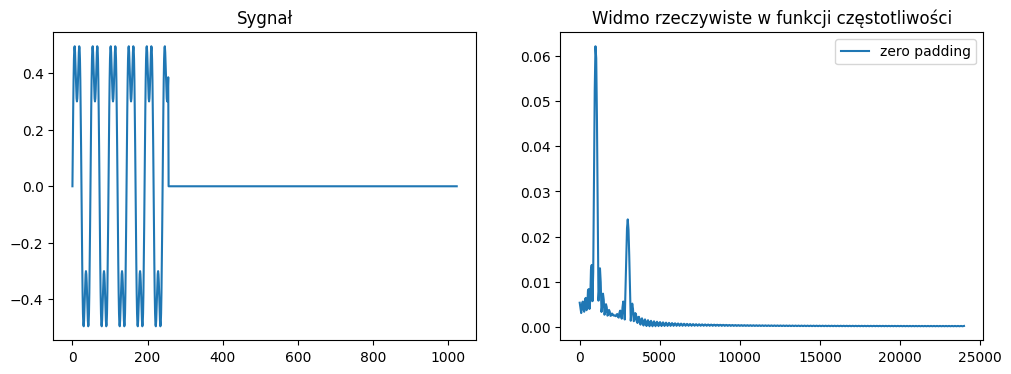

In [23]:
# Zad 3 Zero padding
# Dodamy zera na końcu naszego sygnału co powinno pozwolić nam zwiększyć rozdzielczość widma.
# W tym celu wykorzystamy sygnał teoretyczny
fs = 48000
N = np.arange(256)
sinus = 0.5 * np.sin(2 * np.pi * N * 1000 / fs) + 0.2 * np.sin(2 * np.pi * N * 3000 / fs)
zeros = np.zeros(256*3)
sinus = np.concatenate((sinus,zeros))
widmo = np.fft.rfft(sinus)
widmo_amp = np.abs(widmo) / 1024
f = np.fft.rfftfreq(1024, 1/fs)

n = np.arange(1024)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(n, sinus)
ax2.plot(f, widmo_amp, label = "zero padding")
ax1.set_title("Sygnał")
ax2.set_title("Widmo rzeczywiste w funkcji częstotliwości")
ax2.legend(loc=1)
# Zauważalne zwiększenie rozdzielczości dla widma
# Uzupełnianie zerami daje lepszą interpolację tego samego widma, bez dodawania dodatkowych informacji.

In [24]:
# Zad 4 Upsampling
# sygnał analogiczny do poprzedniego zadania
N = np.arange(256)
sinus = 0.5 * np.sin(2 * np.pi * N * 1000 / fs) + 0.2 * np.sin(2 * np.pi * N * 3000 / fs)
# wstawiamy zera pomiędzy próbkami, ponieważ chcemy dla sygnału 4x dłuższego będą to po 3 zera
new = []
counter = 0
for i in range(1024):
    if i%4 == 0:
        new.append(sinus[counter])
        counter+=1
    else:
        new.append(0)
new = np.array(new)

# dla porównania:
# sygnał 3x dłuższy:
new3 = []
counter = 0
for i in range(256*3):
    if i%3 == 0:
        new3.append(sinus[counter])
        counter+=1
    else:
        new3.append(0)
new3 = np.array(new3)

# sygnał 2x dłuższy:
new2 = []
counter = 0
for i in range(256*2):
    if i%2 == 0:
        new2.append(sinus[counter])
        counter+=1
    else:
        new2.append(0)
new2 = np.array(new2)


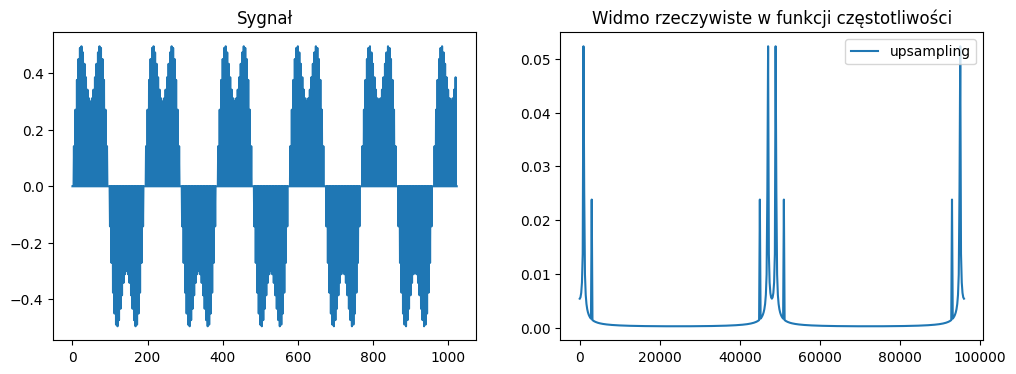

In [25]:
widmo = np.fft.rfft(new)
widmo_amp = np.abs(widmo) / 1024
f = np.fft.rfftfreq(1024, 1/fs/4)

n = np.arange(1024)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(n, new)
ax2.plot(f, widmo_amp, label = "upsampling")
ax1.set_title("Sygnał")
ax2.set_title("Widmo rzeczywiste w funkcji częstotliwości")
ax2.legend(loc=1)
# Otrzymaliśmy kilka kopii początkowego widma, część to lustrzane odbicia, kopie pojawiają się wokół wartości będących wielokrotnościami
# początkowej częstotliwości próbkowania i są symetryczne względem prostych x = n*fs, gdzię n - liczby naturalne

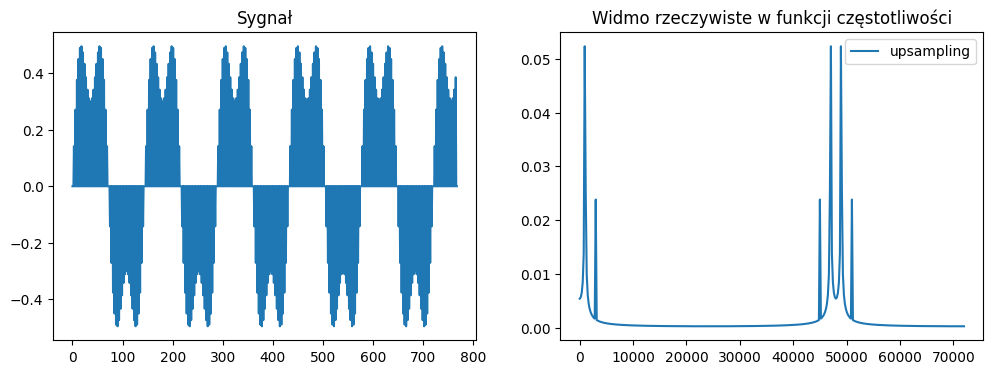

In [26]:
widmo = np.fft.rfft(new3)
widmo_amp = np.abs(widmo) / 1024
f = np.fft.rfftfreq(256*3, 1/fs/3)

n = np.arange(256*3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(n, new3)
ax2.plot(f, widmo_amp, label = "upsampling")
ax1.set_title("Sygnał")
ax2.set_title("Widmo rzeczywiste w funkcji częstotliwości")
ax2.legend(loc=1)
# Otrzymaliśmy kilka kopii początkowego widma, część z nich to lustrzane odbicia 

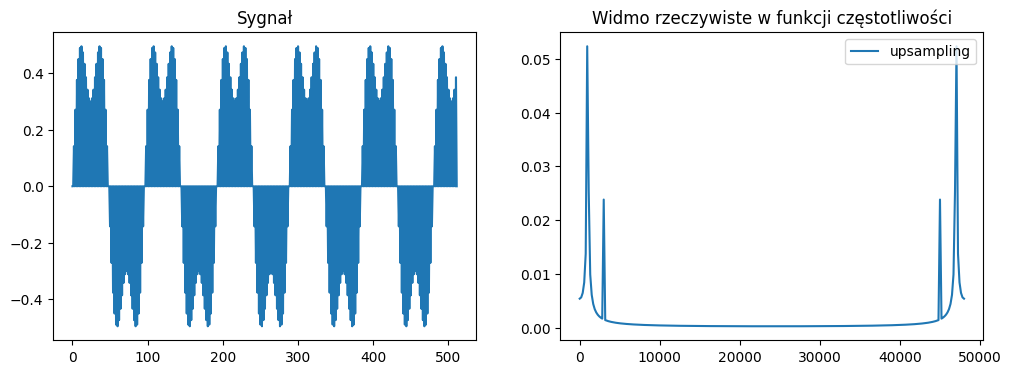

In [27]:
widmo = np.fft.rfft(new2)
widmo_amp = np.abs(widmo) / 1024
f = np.fft.rfftfreq(256*2, 1/fs/2)

n = np.arange(256*2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(n, new2)
ax2.plot(f, widmo_amp, label = "upsampling")
ax1.set_title("Sygnał")
ax2.set_title("Widmo rzeczywiste w funkcji częstotliwości")
ax2.legend(loc=1)
# Otrzymaliśmy kilka kopii początkowego widma, część z nich to lustrzane odbicia 

Wnioski:

Podczas wykonywania posczególnych zadań dogłębniej zapoznano się z pojęciami: częstość próbkowania, częstość Nyquista, aliasing, zero-padding oraz upsampling a także podstawowymi własnościami transformaty Fouriera i zastosowaniem różnego rodzaju okien czasowych.

Z sukcesem wygenerowano i przeanalizowano poszczególne sygnały wraz z ich widmami. Możliwe było zobaczenie jaki wpływ na sygnał i jego widmo ma dobór odpowiedniego okna - widocznie większe rozmycie dla okna prostokątnego w porównaniu do funkcji Hamminga.

Dla przykładu muzycznegom próbkowanego z różną częstością, możliwe było zobrazowanie różnicy między sygnałem próbkowanym powyżej i poniżej częstotliwości Nyquista (aliasingu). Dokonano również dodatkowego zilustrowania wyników poprzez wyeksportowanie i przesłuchanie odtworzonej dla poszczególnych częstości próbkowania muzyki, co pozwoliło szerzej zbadać temat.

Następnie wykorzystano sygnał teoretyczny do sprawdzenia jaki wpływ na widmo mają techniki zero padding oraz upsampling. W przypadku zero padding otrzymano znacznie poprawioną rozdzielczość widma dla badanego sygnału. W przypadku upsamplingu zaobserwowano natomiast pojawienie się kopii pików dla częstotliwości będących wielokrotnościami początkowej częstości próbkowania wygenerowanego sygnału a także ich lustrzanych odbić symetrycznych względem prostych o równaniu x = n * fs, gdzie n - kolejne liczby naturalne, fs - częstotliwość próbkowania sygnału oryginalnego (przed upsamplingiem). 